# What is Structural Equation Modeling?

Structural Equation Models are models that explain relationships between measured variables and latent variables, and relationships between latent variables.

Latent variables are variables that, as humans, we understand as a concept, but that cannot be measured directly.

A great example of a latent variable that cannot really be measured directly is Intelligence.

So you will need a model to convert the measured variables (test scores) into the latent variable Intelligence.

# When to use Structural Equation Modeling?

If you want to use Structural Equation Modeling, you must try to identify the underlying concept that is important but not measurable.

Structural Equation Modeling applies mostly as a confirmation and testing method.

Structural Equation Modeling is therefore not suitable as a purely exploratory tool. If you haven’t yet any idea of how the relationships around your use case could be linked, you’d be better off using other techniques that are made for the exploration of latent variable problems. 

Structural Equation Models are great for analysis. They help you to learn a lot about different concepts that influence a latent phenomenon.

Structural Equation Models give you estimates of coefficients based on the hypothesized relationships between variables. It cannot find other relationships than those that you specify. 

# Types of Structural Equation Modeling

    measured variables
    latent variables
    hypothesized relations between variables

# Example of Structural Equation Modeling

an example of Structural Equation Modeling about performance at work. The most important variable of this project is Job Performance. Job Performance is a latent variable in our example because it is impossible to measure it directly.

In our case, consider an office job in which Job Performance is estimated based on three measured variables:

    ClientSat: A satisfaction rating between 1 and 100 by your main client
    SuperSat: A rating on Job Performance between 1 and 100 by your superior
    ProjCompl: The percentage of your projects that was successfully delivered

Let’s start from the hypothesis that Job Performance is strongly impacted by three other latent variables: the employees Social Skills, Intellectual Skills, and Motivation.

Each of these latent variables can also not be measured directly. Let’s, therefore, define the measured variables for each of the independent latent variables as well.

The latent variable Social Skills will be based on the following two measured variables:

    PsychTest1: a score between 1–100
    PsychTest2: also a score between 1–100

The latent variable Intellectual Skills will be based on the following two measured variables:

    YrsEdu: Number of years of higher education followed
    IQ: Score on an IQ test

The latent variable Motivation will be based on the following two measured variables:

    HrsTrain: Number of hours spent on training
    HrsWrk: Average number of hours in a workweek

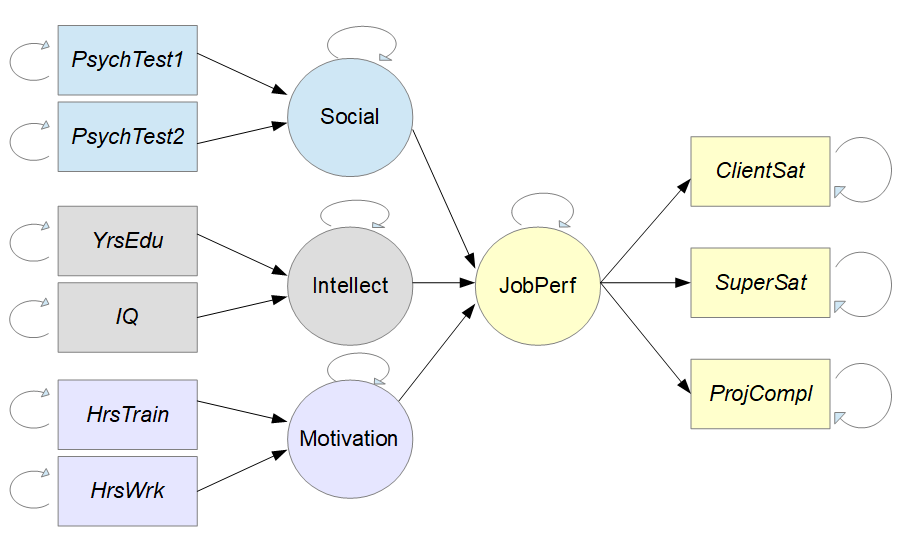

the goal of Structural Equation modeling techniques is to estimate coefficients for each of the arrows in your diagram. Each arrow is a coefficient, and the standard errors are also to be estimated. Those estimates will allow you to quantify the complex relationships between the measured variables and the latent variables.

In [2]:
import pandas as pd
import semopy

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import statistic
%reload_ext autoreload

# Load data

In [4]:
# import the csv file directly from an s3 bucket
data = pd.read_csv(r'E:\gitlab\dataset\StructuralEquationModelingData.csv')

In [5]:
data

PsychTest1  PsychTest2  YrsEdu   IQ  HrsTrn  HrsWrk  ClientSat  SuperSat  \
0            62          78       5   97       6      33         84        59   
1            46          27       2   93       7      54         55        38   
2            68          75       2   96       5      47         70        68   
3            55          56       4  103       7      80         63        81   
4            51          32       4   98       5      53         55        39   
..          ...         ...     ...  ...     ...     ...        ...       ...   
995          55          38       5  103       9      56         70        56   
996          53          43       5   99       7      44         68        47   
997          41          49       3   94       3      36         39        41   
998          52          54       2  102       8      70         58        69   
999          38          18       0  100      14     100         44        65   

     ProjCompl  
0           34  
1           56  
2           38  
3           78  
4           56  
..         ...  
995         60  
996         49  
997         38  
998         64  
999         96  

[1000 rows x 9 columns]

# model

In [6]:
# Specify the model relations using the same syntax given before
model_spec = """
  # measurement model
    JobPerf =~ ClientSat + SuperSat + ProjCompl
    Social =~ PsychTest1 + PsychTest2
    Intellect =~ YrsEdu + IQ
    Motivation =~ HrsTrn + HrsWrk
  # regressions
    JobPerf ~ Social + Intellect + Motivation
"""

Use the =~ symbol for a definition of a latent variable 

Use the ~ symbol for a regression from one latent variable on one or multiple other latent variables

Use the ~~ symbol if you expect some of the measured variables to have a correlation that is not represented in a latent variable (not necessary for example)

The regression coefficients can be found in lines 0 to 2. You can see in the column p-value that all three have a p-value that is smaller than 0.05, so they are all three significant

In [7]:
result,model,factors,graph,stat_result = statistic.structural_Equ_Modeling(data,
                                                        model_spec)

In [8]:
result

lval  op        rval      Estimate      Est. Std   Std. Err  \
0      JobPerf   ~      Social  5.215180e-01  4.963055e-01   0.047885   
1      JobPerf   ~   Intellect  1.032151e+00  1.219097e-01   0.115839   
2      JobPerf   ~  Motivation  2.963620e+00  8.922178e-01   0.254755   
3    ClientSat   ~     JobPerf  1.000000e+00  3.562282e-01          -   
4     SuperSat   ~     JobPerf  2.509328e+00  9.834207e-01   0.208657   
5    ProjCompl   ~     JobPerf  2.572796e+00  8.480929e-01   0.219377   
6   PsychTest1   ~      Social  1.000000e+00  6.383510e-01          -   
7   PsychTest2   ~      Social  2.341251e+00  1.000000e+00   0.094748   
8       YrsEdu   ~   Intellect  1.000000e+00  4.636923e-01          -   
9           IQ   ~   Intellect  4.674039e+00  1.000000e+00   0.496779   
10      HrsTrn   ~  Motivation  1.000000e+00  8.163575e-01          -   
11      HrsWrk   ~  Motivation  1.187320e+01  1.000000e+00   0.270772   
12     JobPerf  ~~     JobPerf  7.797023e-17  1.719781e-18   0.278511   
13      Social  ~~      Social  4.105966e+01  1.000000e+00   3.672449   
14      Social  ~~   Intellect -2.088607e-02 -4.098512e-03   0.161169   
15      Social  ~~  Motivation -8.757235e-01 -6.741912e-02   0.413693   
16   Intellect  ~~   Intellect  6.324783e-01  1.000000e+00   0.098491   
17   Intellect  ~~  Motivation  2.201178e-02  1.365388e-02   0.051041   
18  Motivation  ~~  Motivation  4.109154e+00  1.000000e+00   0.260587   
19  PsychTest1  ~~  PsychTest1  5.970221e+01  5.925079e-01   2.727341   
20      YrsEdu  ~~      YrsEdu  2.309137e+00  7.849894e-01   0.117144   
21    SuperSat  ~~    SuperSat  9.706742e+00  3.288376e-02   1.098724   
22      HrsTrn  ~~      HrsTrn  2.056677e+00  3.335604e-01   0.093757   
23      HrsWrk  ~~      HrsWrk  1.965791e-15  3.393511e-18   2.562788   
24  PsychTest2  ~~  PsychTest2  1.046991e-14  4.651914e-17   3.050375   
25   ProjCompl  ~~   ProjCompl  1.171335e+02  2.807384e-01   5.344747   
26          IQ  ~~          IQ  0.000000e+00  0.000000e+00   1.208185   
27   ClientSat  ~~   ClientSat  3.119349e+02  8.731015e-01  13.951072   

      z-value   p-value  
0   10.891144       0.0  
1    8.910218       0.0  
2   11.633198       0.0  
3           -         -  
4   12.026117       0.0  
5   11.727732       0.0  
6           -         -  
7   24.710387       0.0  
8           -         -  
9     9.40869       0.0  
10          -         -  
11   43.84937       0.0  
12        0.0       1.0  
13  11.180458       0.0  
14  -0.129591   0.89689  
15  -2.116842  0.034273  
16   6.421713       0.0  
17   0.431259   0.66628  
18  15.768836       0.0  
19  21.890263       0.0  
20     19.712       0.0  
21   8.834556       0.0  
22   21.93631       0.0  
23        0.0       1.0  
24        0.0       1.0  
25  21.915634       0.0  
26        0.0       1.0  
27  22.359204       0.0

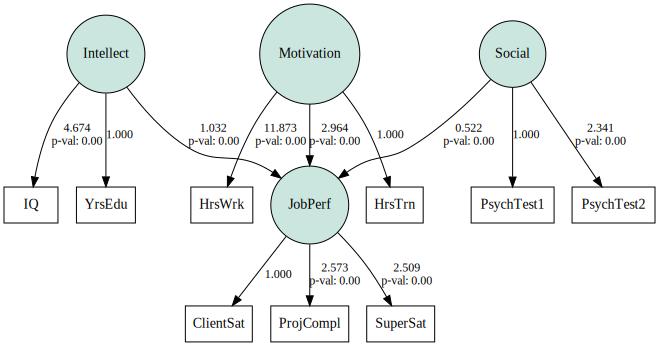

In [9]:
graph

In [10]:
stat_result

DoF  DoF Baseline         chi2  chi2 p-value  chi2 Baseline       CFI  \
Value   21            36  3594.060279           0.0   10295.641357  0.651736   

            GFI      AGFI       NFI       TLI     RMSEA        AIC  \
Value  0.650914  0.401568  0.650914  0.402977  0.412694  40.811879   

              BIC   LogLik  
Value  158.598006  3.59406

In the column Estimate you can obtain the coefficient estimates:

    1. semopy has found a coefficient of 2.96 for Motivation
    2. The estimate for Intellect comes in second, although its estimate is quite a bit higher 1.04 in semopy
    3. Social Skills come in as the least impacting latent variable. The semopyestimate is 0.527

Structural Equation Models are never perfect, so if the negative variances are in less important parameters, there is no problem to continue. Otherwise, you may want to play on model definition and data set: a common cause for the Heywood case is having too strongly correlated variables.

# Chi-Square Test of the overall Structural Equation Model

This test gives you a p-value that shows you whether your model seems to be explaining an important enough part of the variation in the data.

# Regression Coefficients of the Structural Equation Model

    1. Motivation has the highest coefficient (2.758), meaning that a change in Motivation will have the largest impact on Job Performance.
    2. Intellect has the second-highest coefficient (0.725), meaning that Intellect has the second-highest impact on Job Performance.
    3. Social Skills come in last with a coefficient of 0.325. Social Skills still have an impact on Job Performance, it is just less than Motivation and Intellect.